### Three optimization problems

Apply RHC, SA, GA, MIMIC to FlipFlop, Knapsack, TSP, 4-Peaks, OneMax, 8-Queens, MaxKColor, 6-Peaks

In [7]:
import mlrose
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

### FlipFlop

In [175]:
def fit_flipflop(input, m_attempts):
    output = []
    fitness = mlrose.FlipFlop()
    for i, v in enumerate(input):
        np.random.seed(1)
        problem = mlrose.DiscreteOpt(length=v, fitness_fn=fitness, maximize=True, max_val=2)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, restarts=5, max_attempts=m_attempts)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=m_attempts)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, max_attempts=m_attempts)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=m_attempts)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
    return output

In [211]:
input = range(10, 200, 30)
result_flipflop_att_50 = fit_flipflop(input, 50)


Problem length = 10
RHC	9.0	0.008021116256713867
SA	9.0	0.00601506233215332
GA	9.0	0.7499935626983643
MIMIC	9.0	1.6684372425079346

Problem length = 40
RHC	33.0	0.014037132263183594
SA	38.0	0.04411673545837402
GA	32.0	1.265409231185913
MIMIC	38.0	23.917561054229736

Problem length = 70
RHC	58.0	0.03609728813171387
SA	67.0	0.09625482559204102
GA	51.0	2.0695033073425293
MIMIC	61.0	75.56295347213745

Problem length = 100
RHC	83.0	0.04612326622009277
SA	96.0	0.2938196659088135
GA	69.0	1.1570370197296143
MIMIC	83.0	152.9337112903595

Problem length = 130
RHC	103.0	0.05815434455871582
SA	122.0	0.18944025039672852
GA	87.0	2.1106131076812744
MIMIC	108.0	285.4922363758087

Problem length = 160
RHC	131.0	0.11229944229125977
SA	154.0	0.3850886821746826
GA	107.0	2.8586020469665527
MIMIC	138.0	432.9735016822815

Problem length = 190
RHC	151.0	0.12934517860412598
SA	180.0	0.3950495719909668
GA	124.0	1.9160957336425781
MIMIC	154.0	602.8102293014526


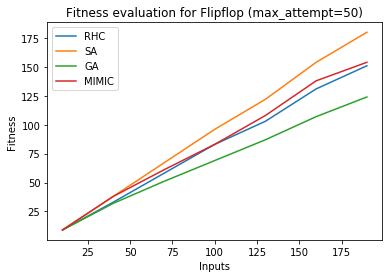

In [212]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_flipflop_att_50)

input = range(10, 200, 30)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for Flipflop (max_attempt=50)')
plt.legend()

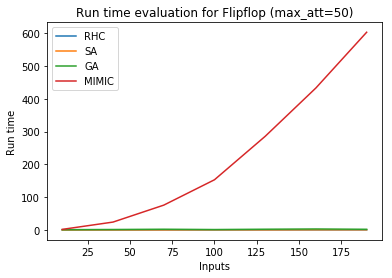

In [213]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for Flipflop (max_att=50)')
plt.legend(loc='best')

In [6]:
fit_flipflop([10, 50, 90, 130])


Problem length = 10
RHC	9.0	0.011026620864868164
SA	9.0	0.010026931762695312
GA	9.0	0.5404438972473145
MIMIC	9.0	1.2654201984405518

Problem length = 50
RHC	42.0	0.03004288673400879
SA	48.0	0.023061752319335938
GA	39.0	1.776747465133667
MIMIC	45.0	34.747859477996826

Problem length = 90
RHC	74.0	0.0731961727142334
SA	87.0	0.052141427993774414
GA	64.0	1.283473253250122
MIMIC	77.0	124.34791898727417

Problem length = 130
RHC	105.0	0.1262953281402588
SA	121.0	0.25166988372802734
GA	87.0	3.0862724781036377
MIMIC	106.0	268.64217710494995


In [176]:
input = range(10, 100, 20)
result_flipflop_att_100 = fit_flipflop(input, 100)


Problem length = 10
RHC	9.0	0.014037132263183594
SA	9.0	0.0170443058013916
GA	9.0	1.0969178676605225
MIMIC	9.0	2.439486503601074

Problem length = 30
RHC	26.0	0.014038324356079102
SA	29.0	0.09429097175598145
GA	25.0	2.474585771560669
MIMIC	27.0	22.30137062072754

Problem length = 50
RHC	41.0	0.025005340576171875
SA	49.0	0.13034558296203613
GA	39.0	1.8759887218475342
MIMIC	46.0	65.27563333511353

Problem length = 70
RHC	60.0	0.03906583786010742
SA	67.0	0.13636302947998047
GA	52.0	2.634004831314087
MIMIC	63.0	135.9545919895172

Problem length = 90
RHC	78.0	0.06212925910949707
SA	87.0	0.3368964195251465
GA	65.0	3.1062612533569336
MIMIC	83.0	342.84479689598083


In [5]:
fitness = mlrose.FlipFlop()
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

In [6]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.random_hill_climb(problem)

print(best_state)
print(best_fitness)

[0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1]
63.0
Wall time: 3.01 ms


In [7]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.simulated_annealing(problem)

print(best_state)
print(best_fitness)

[1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0]
83.0
Wall time: 37.1 ms


In [8]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem)

print(best_state)
print(best_fitness)

[1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0
 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1]
68.0
Wall time: 829 ms


In [9]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.mimic(problem)

print(best_state)
print(best_fitness)

[1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1]
86.0
Wall time: 1min 40s


### SA is the winner!

### Knapsack

In [18]:
weights = [1, 1, 2, 4, 12]
values = [2, 1, 2, 10, 4]

fitness = mlrose.Knapsack(weights, values, max_weight_pct=0.75)
problem = mlrose.DiscreteOpt(length=5, fitness_fn=fitness, maximize=True, max_val=2)

In [20]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.mimic(problem)

print(best_state)
print(best_fitness)

[1 1 1 1 0]
15.0
Wall time: 202 ms


In [22]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem)

print(best_state)
print(best_fitness)

[1 1 1 1 0]
15.0
Wall time: 276 ms


In [25]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.random_hill_climb(problem, max_attempts=1000, restarts=100)

print(best_state)
print(best_fitness)

[1 1 1 1 0]
15.0
Wall time: 4.53 s


In [30]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts=1000, init_state=np.array([0,0,0,0,0]))

print(best_state)
print(best_fitness)

[1 1 1 1 0]
15.0
Wall time: 71.2 ms


In [12]:
def fit_knapsack(input):
    output = []
    for i, v in enumerate(input):
        np.random.seed(1)
        weights = np.random.choice(range(1,100), v)
        values = np.random.choice(range(1,100), v)
        fitness = mlrose.Knapsack(weights, values, max_weight_pct=0.75)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()
            np.random.seed(1)
            problem = mlrose.DiscreteOpt(length=v, fitness_fn=fitness, maximize=True, max_val=2)

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, restarts=10, max_attempts=50, max_iters=100)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=50, max_iters=100)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, max_attempts=50, max_iters=100)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=50, max_iters=100)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
            
    return output

In [22]:
input = [10, 50, 130, 290]
result = fit_knapsack(input)


Problem length = 10
RHC	329.0	0.018045425415039062
SA	315.0	0.004011392593383789
GA	373.0	0.6387510299682617
MIMIC	373.0	1.3184661865234375

Problem length = 50
RHC	2018.0	0.022060394287109375
SA	1992.0	0.0030069351196289062
GA	1913.0	1.3726603984832764
MIMIC	2174.0	39.14741325378418

Problem length = 130
RHC	5263.0	0.027024507522583008
SA	4524.0	0.0040094852447509766
GA	4662.0	2.000333070755005
MIMIC	6207.0	318.0690987110138

Problem length = 290
RHC	9667.0	0.035092830657958984
SA	9157.0	0.004012584686279297
GA	9071.0	2.2800774574279785
MIMIC	12842.0	1604.8645107746124


In [31]:
def get_results(result):
    rhc_fit = [item[2] for item in result if item[1]=='RHC']
    rhc_run = [item[3] for item in result if item[1]=='RHC']
    sa_fit = [item[2] for item in result if item[1]=='SA']
    sa_run = [item[3] for item in result if item[1]=='SA']
    ga_fit = [item[2] for item in result if item[1]=='GA']
    ga_run = [item[3] for item in result if item[1]=='GA']
    mimic_fit = [item[2] for item in result if item[1]=='MIMIC']
    mimic_run = [item[3] for item in result if item[1]=='MIMIC']
    return rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run

In [32]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result)

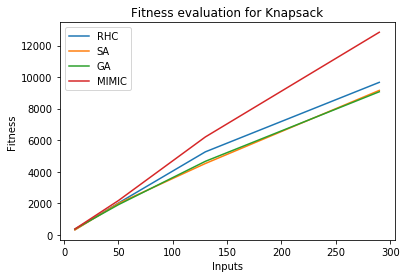

In [34]:
input = [10, 50, 130, 290]
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for Knapsack')
plt.legend()

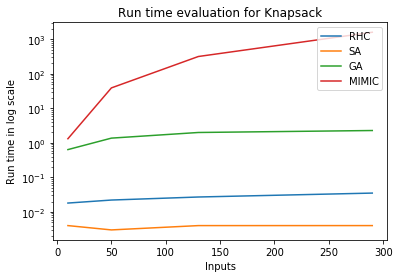

In [35]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time in log scale')
plt.yscale('log')
plt.title('Run time evaluation for Knapsack')
plt.legend(loc='best')

In [86]:
fit_knapsack(100, 3)


Problem length = 100
RHC	3863.0	0.0020046234130859375
SA	3467.0	0.003008127212524414
GA	3641.0	0.24271345138549805
MIMIC	4938.0	53.71778869628906

Problem length = 200
RHC	6279.0	0.0030074119567871094
SA	6129.0	0.005014181137084961
GA	7251.0	0.7901020050048828
MIMIC	9412.0	279.35194969177246

Problem length = 300
RHC	9203.0	0.00400996208190918
SA	9372.0	0.005013704299926758
GA	8887.0	0.43318772315979004
MIMIC	13130.0	706.5119392871857


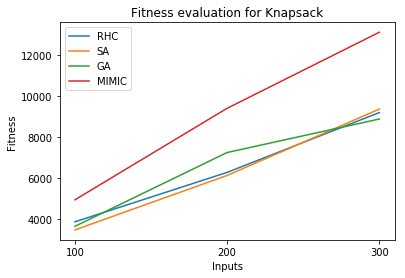

In [218]:
input = [100, 200, 300]
rhc_fit = [3863.0, 6279.0, 9203.0]
sa_fit = [3467.0, 6129.0, 9372.0]
ga_fit = [3641.0, 7251.0, 8887.0]
mimic_fit = [4938.0, 9412.0, 13130.0]
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for Knapsack')
plt.xticks(input)
plt.legend()

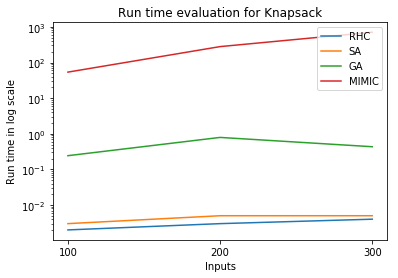

In [220]:
input = [100, 200, 300]
rhc_run = [0.0020046234130859375, 0.0030074119567871094, 0.00400996208190918]
sa_run = [0.003008127212524414, 0.005014181137084961, 0.005013704299926758]
ga_run = [0.24271345138549805, 0.7901020050048828, 0.43318772315979004]
mimic_run = [53.71778869628906, 279.35194969177246, 706.5119392871857]

plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time in log scale')
plt.yscale('log')
plt.title('Run time evaluation for Knapsack')
plt.xticks(input)
plt.legend(loc='best')

### MIMIC wins for the Knapsack problem although it's taking long time!

### TSP

In [65]:
def coords_gen(input, n):
    np.random.seed(1)
    result = set()
    while len(result) < n:
        result.add(tuple(np.random.choice(input, 2)))
    return list(result)

In [73]:
coords_list = coords_gen(range(1,20), 20)

fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize=False)

In [74]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.random_hill_climb(problem_fit, restarts=10, max_attempts=10)

print(best_state)
print(best_fitness)

[ 7 14  1 19 17  2 16  0  8 15 13  4 18 11  5  3  9 10 12  6]
120.73345002507048
Wall time: 159 ms


In [75]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.mimic(problem_fit, max_attempts=10)

print(best_state)
print(best_fitness)

[ 6 15  7 14  0 13  8 19  1 11 17  3  9 12  5 10  2 16 18  4]
121.46124057738378
Wall time: 3.86 s


In [80]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.simulated_annealing(problem_fit, max_attempts=150)

print(best_state)
print(best_fitness)

[ 3  9  2 16  7 14 18  4 12 10 17 11 19  5  6 13  8  0 15  1]
106.7954557694458
Wall time: 121 ms


In [82]:
%%time

# Set random seed
np.random.seed(1)

# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, max_attempts=200, mutation_prob=0.5)

print(best_state)
print(best_fitness)

[15 13 16  2 10  3  1 19  8  0 18 11  4 14  7 12  5 17  9  6]
131.94326397486608
Wall time: 19.8 s


In [184]:
def fit_TSP(input, arr, m_attempt):
    output = []
    for v in input:
        np.random.seed(1)
        coords_list = coords_gen(arr, v)
        fitness = mlrose.TravellingSales(coords = coords_list)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()
            np.random.seed(1)
            problem = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness, maximize=False)

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, restarts=5, max_attempts=m_attempt)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=m_attempt)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, mutation_prob=0.3, max_attempts=m_attempt)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=m_attempt)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
            
    return output

In [185]:
result_TSP = fit_TSP([10, 30, 50, 70], range(1, 50), 50)


Problem length = 10
RHC	126.4056083282671	0.10427689552307129
SA	139.45284130584585	0.01809239387512207
GA	128.14325313539499	1.9912986755371094
MIMIC	135.12472032605802	5.9257590770721436

Problem length = 30
RHC	319.3491257862546	0.4973733425140381
SA	449.36539243267015	0.06015515327453613
GA	525.3057859491166	13.998181819915771
MIMIC	564.6026825668978	26.741113662719727

Problem length = 50
RHC	501.1670819274406	1.5100598335266113
SA	643.9059292277259	0.2803072929382324
GA	942.536329378701	11.50464153289795
MIMIC	1014.5309343513192	61.64693784713745

Problem length = 70
RHC	707.3477205921478	3.084202766418457
SA	668.2587891897399	0.9154748916625977
GA	1374.5989134374881	17.415316820144653
MIMIC	1476.8947190970473	130.52408695220947


### 4-Peaks

In [127]:
fn = mlrose.FourPeaks(t_pct=0.25)
problem = mlrose.DiscreteOpt(length=20, fitness_fn=fn, maximize=True)

In [135]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts=50)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
20.0
Wall time: 18 ms


In [136]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.random_hill_climb(problem, restarts=10, max_attempts=50)

print(best_state)
print(best_fitness)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
20.0
Wall time: 36.1 ms


In [137]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem, max_attempts=50)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
34.0
Wall time: 687 ms


In [138]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.mimic(problem, max_attempts=50)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
34.0
Wall time: 5.61 s


In [199]:
def fit_4peaks(input, m_attempt):
    output = []
    fitness = mlrose.FourPeaks(t_pct=0.25)
    for v in input:
        np.random.seed(1)
        problem = mlrose.DiscreteOpt(length=v, fitness_fn=fitness, maximize=True, max_val=2)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, max_attempts=m_attempt, restarts=5)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=m_attempt)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, max_attempts=m_attempt)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=m_attempt)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
    return output

In [200]:
input = range(10, 50, 10)
result_4peaks_10 = fit_4peaks(input, 10)


Problem length = 10
RHC	10.0	0.002005338668823242
SA	10.0	0.0030083656311035156
GA	16.0	0.16142964363098145
MIMIC	16.0	0.2837545871734619

Problem length = 20
RHC	7.0	0.0010027885437011719
SA	18.0	0.0020051002502441406
GA	34.0	0.1834862232208252
MIMIC	34.0	1.5350842475891113

Problem length = 30
RHC	8.0	0.0010027885437011719
SA	22.0	0.009023666381835938
GA	45.0	0.21356678009033203
MIMIC	47.0	5.194815397262573

Problem length = 40
RHC	8.0	0.003007650375366211
SA	38.0	0.02005290985107422
GA	56.0	0.42813944816589355
MIMIC	56.0	7.845927000045776


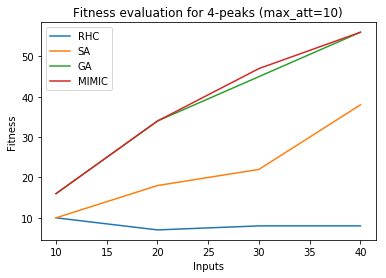

In [207]:
input = range(10, 50, 10)
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_10)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_att=10)')
plt.legend()

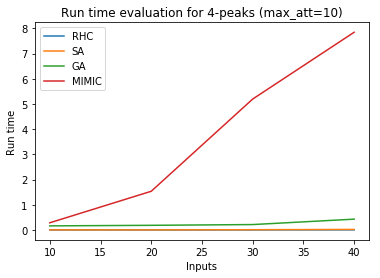

In [208]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_att=10)')
plt.legend(loc='best')

In [214]:
input = range(10, 50, 10)
result_4peaks_100 = fit_4peaks(input, 100)


Problem length = 10
RHC	16.0	0.01905083656311035
SA	10.0	0.0070192813873291016
GA	16.0	1.141087532043457
MIMIC	16.0	2.7823715209960938

Problem length = 20
RHC	34.0	0.022060632705688477
SA	20.0	0.00601506233215332
GA	34.0	1.3977255821228027
MIMIC	34.0	10.884017944335938

Problem length = 30
RHC	30.0	0.03710222244262695
SA	51.0	0.015036821365356445
GA	49.0	2.6857962608337402
MIMIC	49.0	26.57373046875

Problem length = 40
RHC	39.0	0.04908037185668945
SA	40.0	0.028074264526367188
GA	58.0	2.075578212738037
MIMIC	59.0	56.062739610672


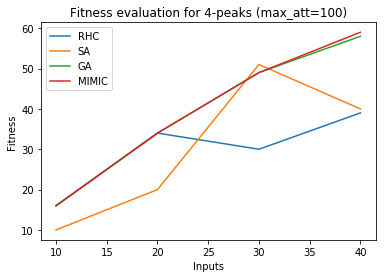

In [215]:
input = range(10, 50, 10)
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_100)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_att=100)')
plt.legend()

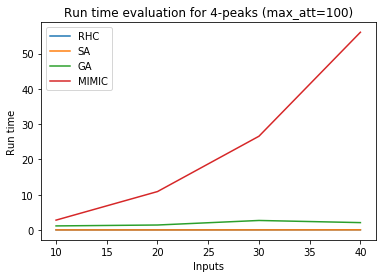

In [216]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_att=100)')
plt.legend(loc='best')

In [201]:
input = range(100, 500, 50)
result_4peaks_20 = fit_4peaks(input, 20)


Problem length = 100
RHC	7.0	0.0020036697387695312
SA	82.0	0.16844701766967773
GA	22.0	0.6868717670440674
MIMIC	20.0	81.52930283546448

Problem length = 150
RHC	2.0	0.001951456069946289
SA	127.0	0.4612236022949219
GA	21.0	0.7840855121612549
MIMIC	22.0	206.69913959503174

Problem length = 200
RHC	3.0	0.0020055770874023438
SA	145.0	0.636693000793457
GA	20.0	1.2703802585601807
MIMIC	32.0	430.6743333339691

Problem length = 250
RHC	6.0	0.0020058155059814453
SA	189.0	1.265364408493042
GA	18.0	0.7063736915588379
MIMIC	19.0	470.11732721328735

Problem length = 300
RHC	5.0	0.0020074844360351562
SA	210.0	2.0735132694244385
GA	23.0	1.1179721355438232
MIMIC	17.0	618.3946974277496

Problem length = 350
RHC	4.0	0.0009479522705078125
SA	246.0	2.914785623550415
GA	18.0	0.9344508647918701
MIMIC	34.0	1367.8368139266968

Problem length = 400
RHC	2.0	0.0020062923431396484
SA	264.0	3.5684897899627686
GA	19.0	1.1620891094207764
MIMIC	32.0	1335.6773643493652

Problem length = 450
RHC	2.0	0.0020048618316650

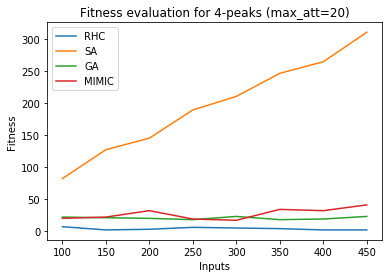

In [209]:
input = range(100, 500, 50)
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_20)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_att=20)')
plt.legend()

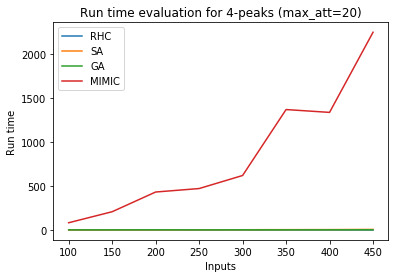

In [210]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_att=20)')
plt.legend(loc='best')

In [205]:
%%time

fn = mlrose.FourPeaks(t_pct=0.25)
problem = mlrose.DiscreteOpt(length=40, fitness_fn=fn, maximize=True)

np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem, max_attempts=50)

# print(best_state)
print(best_fitness)

53.0
Wall time: 716 ms


In [148]:
input = range(10, 100, 10)
result_4peaks = fit_4peaks(input, 10, 100)


Problem length = 10
RHC	16.0	0.01905035972595215
SA	10.0	0.008020639419555664
GA	16.0	1.0809166431427002
MIMIC	16.0	2.438441753387451

Problem length = 20
RHC	34.0	0.0210568904876709
SA	20.0	0.005013227462768555
GA	34.0	1.372649908065796
MIMIC	34.0	10.172051191329956

Problem length = 30
RHC	30.0	0.03409123420715332
SA	51.0	0.014036417007446289
GA	49.0	2.549781322479248
MIMIC	49.0	24.225425958633423

Problem length = 40
RHC	39.0	0.0451197624206543
SA	40.0	0.027072429656982422
GA	58.0	1.8599448204040527
MIMIC	59.0	51.15103101730347

Problem length = 50
RHC	34.0	0.022058725357055664
SA	50.0	0.026068449020385742
GA	27.0	1.6855249404907227
MIMIC	25.0	74.35475754737854

Problem length = 60
RHC	26.0	0.0240020751953125
SA	60.0	0.08623003959655762
GA	20.0	2.1467525959014893
MIMIC	21.0	99.93074679374695

Problem length = 70
RHC	21.0	0.016008377075195312
SA	70.0	0.08723044395446777
GA	22.0	4.0106658935546875
MIMIC	21.0	134.32730054855347

Problem length = 80
RHC	20.0	0.019024133682250977
SA	80.

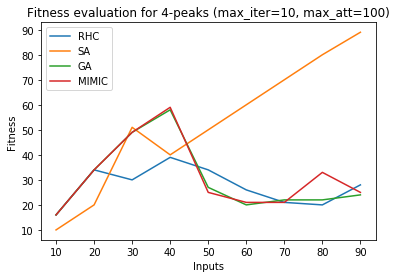

In [160]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_iter=10, max_att=100)')
plt.legend()

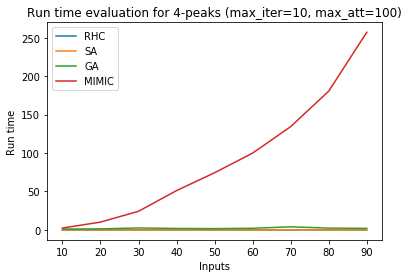

In [161]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_iter=10, max_att=100)')
plt.legend(loc='best')

In [154]:
input = range(10, 100, 10)
result_4peaks_iter_100 = fit_4peaks(input, 100, 100)


Problem length = 10
RHC	16.0	0.014035463333129883
SA	10.0	0.0070188045501708984
GA	16.0	1.1470983028411865
MIMIC	16.0	2.583864450454712

Problem length = 20
RHC	34.0	0.02703237533569336
SA	20.0	0.004009246826171875
GA	34.0	1.479935646057129
MIMIC	34.0	11.055402517318726

Problem length = 30
RHC	30.0	0.038100242614746094
SA	51.0	0.015040397644042969
GA	49.0	2.860605001449585
MIMIC	49.0	26.366199254989624

Problem length = 40
RHC	39.0	0.053141117095947266
SA	40.0	0.029077768325805664
GA	58.0	2.0234227180480957
MIMIC	59.0	51.08682727813721

Problem length = 50
RHC	34.0	0.028074264526367188
SA	50.0	0.028075695037841797
GA	27.0	1.7176105976104736
MIMIC	25.0	74.11706328392029

Problem length = 60
RHC	26.0	0.01804661750793457
SA	60.0	0.07022380828857422
GA	20.0	1.9040751457214355
MIMIC	21.0	100.87121295928955

Problem length = 70
RHC	21.0	0.01804804801940918
SA	70.0	0.08622908592224121
GA	22.0	4.076883316040039
MIMIC	21.0	149.5618462562561

Problem length = 80
RHC	20.0	0.021056175231933594
S

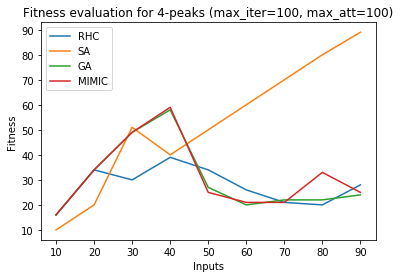

In [157]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_iter_100)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_iter=100, max_att=100)')
plt.legend()

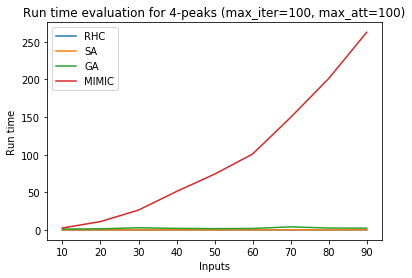

In [158]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_iter=100, max_att=100)')
plt.legend(loc='best')

In [165]:
input = range(10, 100, 10)
result_4peaks_iter_10_att_10 = fit_4peaks(input, 10, 10)


Problem length = 10
RHC	10.0	0.0010023117065429688
SA	10.0	0.0030088424682617188
GA	16.0	0.15140223503112793
MIMIC	16.0	0.27163052558898926

Problem length = 20
RHC	7.0	0.0010025501251220703
SA	18.0	0.0030066967010498047
GA	34.0	0.19251227378845215
MIMIC	34.0	1.3074767589569092

Problem length = 30
RHC	8.0	0.0020067691802978516
SA	22.0	0.008022069931030273
GA	45.0	0.21149873733520508
MIMIC	47.0	4.605592966079712

Problem length = 40
RHC	8.0	0.0009646415710449219
SA	38.0	0.017042875289916992
GA	56.0	0.38001084327697754
MIMIC	56.0	7.714516878128052

Problem length = 50
RHC	5.0	0.0010023117065429688
SA	34.0	0.024064302444458008
GA	18.0	0.23662996292114258
MIMIC	29.0	20.379194974899292

Problem length = 60
RHC	3.0	0.0010027885437011719
SA	37.0	0.03208494186401367
GA	16.0	0.1874985694885254
MIMIC	17.0	13.341480016708374

Problem length = 70
RHC	7.0	0.001003265380859375
SA	35.0	0.04211020469665527
GA	19.0	0.4060800075531006
MIMIC	28.0	35.720032691955566

Problem length = 80
RHC	2.0	0.000963

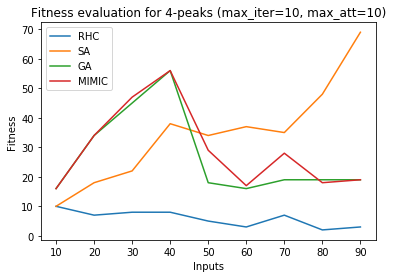

In [166]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_iter_10_att_10)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_iter=10, max_att=10)')
plt.legend()

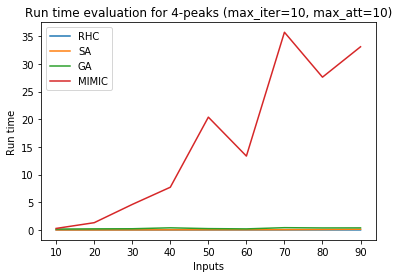

In [167]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_iter=10, max_att=10)')
plt.legend(loc='best')

In [168]:
input = range(10, 100, 10)
result_4peaks_iter_100_att_10 = fit_4peaks(input, 100, 10)


Problem length = 10
RHC	10.0	0.0020046234130859375
SA	10.0	0.0030083656311035156
GA	16.0	0.1423790454864502
MIMIC	16.0	0.2848067283630371

Problem length = 20
RHC	7.0	0.0009551048278808594
SA	18.0	0.002003908157348633
GA	34.0	0.1764693260192871
MIMIC	34.0	1.3917009830474854

Problem length = 30
RHC	8.0	0.0010025501251220703
SA	22.0	0.009026050567626953
GA	45.0	0.2145702838897705
MIMIC	47.0	4.757723569869995

Problem length = 40
RHC	8.0	0.0009295940399169922
SA	38.0	0.015039443969726562
GA	56.0	0.3901100158691406
MIMIC	56.0	8.073442697525024

Problem length = 50
RHC	5.0	0.0009593963623046875
SA	34.0	0.02606797218322754
GA	18.0	0.23763394355773926
MIMIC	29.0	19.603132009506226

Problem length = 60
RHC	3.0	0.0010018348693847656
SA	37.0	0.03308868408203125
GA	16.0	0.2215895652770996
MIMIC	17.0	13.267321109771729

Problem length = 70
RHC	7.0	0.0
SA	35.0	0.04307413101196289
GA	19.0	0.4201672077178955
MIMIC	28.0	36.61833333969116

Problem length = 80
RHC	2.0	0.0010030269622802734
SA	48.0	0.0

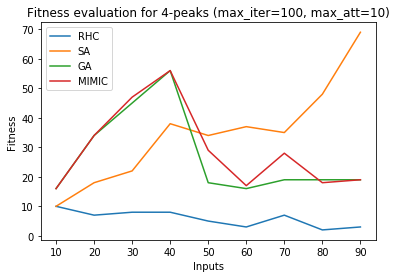

In [169]:
rhc_fit, rhc_run, sa_fit, sa_run, ga_fit, ga_run, mimic_fit, mimic_run = get_results(result_4peaks_iter_100_att_10)
plt.plot(input, rhc_fit, label='RHC')
plt.plot(input, sa_fit, label='SA')
plt.plot(input, ga_fit, label='GA')
plt.plot(input, mimic_fit, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Fitness')
plt.title('Fitness evaluation for 4-peaks (max_iter=100, max_att=10)')
plt.legend()

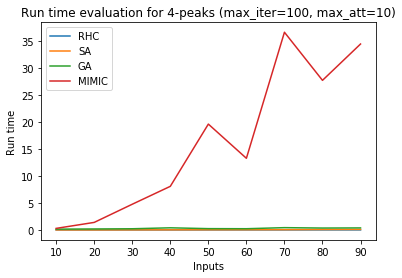

In [170]:
plt.plot(input, rhc_run, label='RHC')
plt.plot(input, sa_run, label='SA')
plt.plot(input, ga_run, label='GA')
plt.plot(input, mimic_run, label='MIMIC')
plt.xlabel('Inputs')
plt.ylabel('Run time')
# plt.yscale('log')
plt.title('Run time evaluation for 4-peaks (max_iter=100, max_att=10)')
plt.legend(loc='best')

### OneMax

In [40]:
fn = mlrose.OneMax()
problem = mlrose.DiscreteOpt(length=500, fitness_fn=fn, maximize=True, max_val=2)

In [43]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.random_hill_climb(problem, restarts=10)

# print(best_state)
print(best_fitness)

407.0
Wall time: 372 ms


In [45]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.simulated_annealing(problem)

# print(best_state)
print(best_fitness)

340.0
Wall time: 40.1 ms


In [48]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem, max_attempts=100, mutation_prob=0.5, pop_size=500)

# print(best_state)
print(best_fitness)

299.0
Wall time: 58.2 s


In [63]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.mimic(problem)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
100.0
Wall time: 1min 40s


In [69]:
import time

start_time = time.time()
fn = mlrose.OneMax()
for i in range(1, 11):
    np.random.seed(1)
    p = mlrose.DiscreteOpt(length=100*i, fitness_fn=fn, maximize=True, max_val=2)
    best_state, best_fitness = mlrose.mimic(problem)

    run_time = time.time() - start_time

    start_time = time.time()
    print(best_fitness, run_time)    

100.0 55.38027787208557
100.0 57.52803015708923
100.0 49.940773248672485
100.0 48.56916308403015
100.0 47.72391867637634
100.0 51.89805293083191
100.0 51.42472314834595
100.0 51.60524106025696
100.0 58.69215250015259
100.0 58.89234662055969


In [179]:
def fit_onemax(input, m_attempt):
    output = []
    fitness = mlrose.OneMax()
    for i, v in enumerate(input):
        np.random.seed(1)
        problem = mlrose.DiscreteOpt(length=v, fitness_fn=fitness, maximize=True, max_val=2)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, max_attempts=m_attempt, restarts=5)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=m_attempt)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, max_attempts=m_attempt)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=m_attempt)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
    return output

In [181]:
input = range(10, 100, 20)
result_onemax = fit_onemax(input, 30)


Problem length = 10
RHC	10.0	0.0050106048583984375
SA	10.0	0.006018877029418945
GA	10.0	0.44217348098754883
MIMIC	10.0	0.7479908466339111

Problem length = 30
RHC	30.0	0.010025501251220703
SA	29.0	0.0030074119567871094
GA	27.0	0.46323132514953613
MIMIC	30.0	7.253289222717285

Problem length = 50
RHC	49.0	0.01604318618774414
SA	45.0	0.0030078887939453125
GA	38.0	0.4852900505065918
MIMIC	50.0	22.11885976791382

Problem length = 70
RHC	69.0	0.026032209396362305
SA	68.0	0.006016731262207031
GA	54.0	1.0859413146972656
MIMIC	70.0	45.10294198989868

Problem length = 90
RHC	88.0	0.041060686111450195
SA	83.0	0.011031389236450195
GA	63.0	0.7229197025299072
MIMIC	90.0	79.11038613319397


### 8-Queens

In [105]:
fn = mlrose.Queens()
problem = mlrose.DiscreteOpt(length=20, fitness_fn=fn, maximize=False, max_val=20)

In [106]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts=10)

print(best_state)
print(best_fitness)

[12  4  0  3 17  4  9 15 10 18  1  5  2 19 18  2  8  6 11 14]
5.0
Wall time: 68.2 ms


In [107]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.random_hill_climb(problem, restarts=10, max_attempts=10)

print(best_state)
print(best_fitness)

[14 11 13  4  9 11  2 15  1 16  0 12  7 13  6 18  5 19 16 10]
4.0
Wall time: 167 ms


In [116]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem, max_attempts=100)

print(best_state)
print(best_fitness)

[ 5  1  1  8 14 19  3 10 12 16 19 15 10  0  9  6 12  7 12 13]
10.0
Wall time: 6.5 s


In [112]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.mimic(problem)

print(best_state)
print(best_fitness)

[ 0  3  6  4 19 13  4 14  8  2  5  2 15  7 19 10 13  9  1  9]
7.0
Wall time: 2.65 s


### MaxKColor

In [54]:
# edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
def edge_gen(arange, n):
    edges = []
    np.random.seed(1)
    for i in range(n):
        edges.append(tuple(np.random.choice(arange, 2, replace=False)))
    return edges

In [55]:
edges = edge_gen(range(50), 50)

fn = mlrose.MaxKColor(edges)
problem = mlrose.DiscreteOpt(length=50, fitness_fn=fn, maximize=True, max_val=50)

In [60]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.simulated_annealing(problem, max_attempts=100)

print(best_state)
print(best_fitness)

[14 12 29  8 12 12 12  0  8 14 12  8  8 32 12 41  0 14 12 41 12 12 12 41
  0 12 12 12 14 12 27 12 41 16 12 12  9  0 16 14 15 12 12 14  0 12 14  8
 12 16]
44.0
Wall time: 9min 16s


In [64]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem, max_attempts=100, pop_size=500, mutation_prob=0.5)

print(best_state)
print(best_fitness)

[40  7 49 45 43 34 40 41 24 46 24 30  7 21 21 31 41 35 33 46 43 38 33 28
 24  4 34 18 35 28  6 13 15 32 18 18 29 16 22 19 22 18  2 44 45 36 12 21
 37  0]
8.0
Wall time: 17.9 s


### 6-peaks

In [117]:
fn = mlrose.SixPeaks(t_pct=0.15)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fn, maximize=True)

In [126]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.mimic(problem, max_attempts=50)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1
 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
116.0
Wall time: 2min 32s


In [125]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.random_hill_climb(problem, restarts=10, max_attempts=50)

print(best_state)
print(best_fitness)

[0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
13.0
Wall time: 24.1 ms


In [123]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.simulated_annealing(problem)

print(best_state)
print(best_fitness)

[1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
61.0
Wall time: 198 ms


In [124]:
%%time

# Set random seed
np.random.seed(1)

best_state, best_fitness = mlrose.genetic_alg(problem)

print(best_state)
print(best_fitness)

[1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
18.0
Wall time: 332 ms


In [171]:
def fit_6peaks(input, m_iter, m_attempt):
    output = []
    fitness = mlrose.SixPeaks(t_pct=0.1)
    for i, v in enumerate(input):
        np.random.seed(1)
        problem = mlrose.DiscreteOpt(length=v, fitness_fn=fitness, maximize=True, max_val=2)
        print('\nProblem length =', v)
        for alg in ['RHC', 'SA', 'GA', 'MIMIC']:
            start_time = time.time()

            if alg == 'RHC':
                _, best_fitness = mlrose.random_hill_climb(problem, max_attempts=m_attempt, restarts=5)
            if alg == 'SA':
                _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=m_attempt)
            if alg == 'GA':
                _, best_fitness = mlrose.genetic_alg(problem, max_attempts=m_attempt)
            if alg == 'MIMIC':
                _, best_fitness = mlrose.mimic(problem, max_attempts=m_attempt)

            run_time = time.time() - start_time
            start_time = time.time()
            result = [alg, best_fitness, run_time]
            print(*result, sep='\t')
            output.append([v] + result)
    return output

In [172]:
input = range(10, 100, 10)
result_6peaks_iter_10_att_10 = fit_6peaks(input, 10, 10)


Problem length = 10
RHC	18.0	0.0029642581939697266
SA	10.0	0.1975250244140625
GA	18.0	0.13034772872924805
MIMIC	18.0	0.3328852653503418

Problem length = 20
RHC	27.0	0.0020051002502441406
SA	20.0	0.007017612457275391
GA	33.0	0.27878856658935547
MIMIC	34.0	1.5199949741363525

Problem length = 30
RHC	34.0	0.0010027885437011719
SA	42.0	0.005013465881347656
GA	49.0	0.4327077865600586
MIMIC	56.0	3.6847994327545166

Problem length = 40
RHC	8.0	0.0010027885437011719
SA	69.0	0.016041040420532227
GA	57.0	0.3709867000579834
MIMIC	63.0	9.258620977401733

Problem length = 50
RHC	5.0	0.0010027885437011719
SA	74.0	0.01804804801940918
GA	63.0	0.18649554252624512
MIMIC	69.0	11.66910719871521

Problem length = 60
RHC	3.0	0.0009295940399169922
SA	94.0	0.04513192176818848
GA	76.0	0.3930320739746094
MIMIC	80.0	20.68099880218506

Problem length = 70
RHC	7.0	0.002007007598876953
SA	103.0	0.05815482139587402
GA	88.0	0.5564796924591064
MIMIC	87.0	20.682043075561523

Problem length = 80
RHC	2.0	0.0
SA	48.0	0.

In [173]:
input = [100, 200, 300]
result_6peaks = fit_6peaks(input, 10, 10)


Problem length = 100
RHC	5.0	0.0020041465759277344
SA	67.0	0.13034844398498535
GA	117.0	0.28575921058654785
MIMIC	115.0	46.96690273284912

Problem length = 200
RHC	3.0	0.0010025501251220703
SA	124.0	0.505345344543457
GA	20.0	0.5083513259887695
MIMIC	22.0	215.3076684474945

Problem length = 300
RHC	2.0	0.0009870529174804688
SA	168.0	2.1707727909088135
GA	18.0	0.5023355484008789
MIMIC	19.0	441.9344255924225
